# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import ast

## Load the Data

In [2]:
listings = pd.read_csv('../listings_cleaned.csv')

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9277 entries, 0 to 9276
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9277 non-null   int64  
 1   listing_url                                   9277 non-null   object 
 2   name                                          9277 non-null   object 
 3   description                                   9116 non-null   object 
 4   neighborhood_overview                         6648 non-null   object 
 5   picture_url                                   9277 non-null   object 
 6   host_id                                       9277 non-null   int64  
 7   host_url                                      9277 non-null   object 
 8   host_name                                     9274 non-null   object 
 9   host_since                                    9274 non-null   o

In [4]:
#set to display all rows
pd.set_option('max_columns', None)
listings.head(3)

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within a few hours,100%,100%,f,https://a0.muscache.com/im/users/8435/profile_...,https://a0.muscache.com/im/users/8435/profile_...,Mission Beach,3.0,3.0,"['email', 'phone', 'kba']",t,t,Mission Bay,32.78430,-117.25258,Entire condominium,Entire home/apt,6,1 bath,2.0,4.0,"['Stove', 'Smoke alarm', 'Refrigerator', 'Kitc...",2050.0,3,365,3.0,3.0,365.0,365.0,3.0,365.0,t,21,44,74,232,2021-01-24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,Michael,2010-05-21,"San Diego, California, United States",We love living part of the year in San Diego. ...,within an hour,100%,50%,f,https://a0.muscache.com/im/users/129123/profil...,https://a0.muscache.com/im/users/129123/profil...,Pacific Beach,7.0,7.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Pacific Beach,32.80724,-117.25630,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,"['Hot water', 'Smoke alarm', 'Kitchen', 'Hair ...",225.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,t,0,0,0,239,2021-01-24,62,2,0,2010-07-09,2020-11-29,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,5,5,0,0,0.48
2,38245,https://www.airbnb.com/rooms/38245,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,Melinda,2010-07-12,"San Diego, California, United States",Hello Future and Returning Friends! It is Sp...,NaN,NaN,86%,f,https://a0.muscache.com/im/users/164137/profil...,https://a0.muscache.com/im/users/164137/profil...,Loma Portal,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Roseville,32.74202,-117.21870,Private room in house,Private room,1,1 shared bath,1.0,1.0,"['Hot water', 'Smoke alarm', 'Kitchen', 'First...",74.0,1,21,1.0,1.0,21.0,21.0,1.0,21.0,t,30,60,90,365,2021-01-25,143,0,0,2010-09-09,2019-10-20,86.0,9.0,9.0,10.0,10.0,9.0,9.0,f,3,0,3,0,1.13


In [5]:
#reset options to defaults
pd.reset_option('max_columns')

### Neighbourhood

In [6]:
gdf = gpd.read_file('../Data/neighbourhoods.geojson')
gdf.head()

,neighbourhood,neighbourhood_group,geometry
0,Amphitheater And Water Park,None,"MULTIPOLYGON (((-117.01452 32.58790, -117.0144..."
1,Bella Lago,None,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412..."
2,Bonita Long Canyon,None,"MULTIPOLYGON (((-117.01149 32.66352, -117.0114..."
3,East Lake,None,"MULTIPOLYGON (((-116.99302 32.66040, -116.9816..."
4,Eastlake Trails,None,"MULTIPOLYGON (((-116.95512 32.64124, -116.9550..."


In [7]:
#drop neighbourhood_group column because it contains no values
gdf.drop(columns=['neighbourhood_group'],inplace=True)

In [8]:
#set neighbourhood name as index
gdf = gdf.set_index("neighbourhood")

In [9]:
#check Coordinate Reference System (CRS)
#WGS84 is geograhic which means coordinates are in latitude and longtitude
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

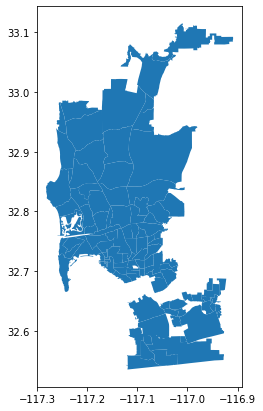

In [10]:
#plot neighbourhood map
f, ax = plt.subplots(1, figsize=(7, 7))
ax = gdf.plot(ax=ax)
plt.show()

## Explore the Data

### Neighbors

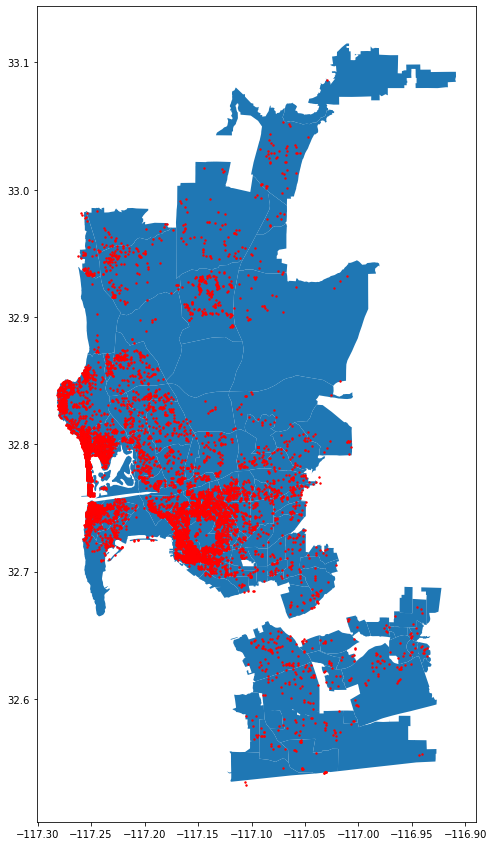

In [11]:
#plot neighbourhood map with listings overlay
f, ax = plt.subplots(1, figsize=(15,15))
gdf.plot(ax=ax)
ax.scatter(listings.longitude,listings.latitude, color='red',s=2)
plt.show()

In [12]:
#how many neighborhood on the map
len(gdf)

108

In [13]:
#how many neighbourhood with listings
listings.neighbourhood.nunique()

102

In [14]:
#create list of all neighbourhood
n1 = gdf.index.to_list();
#create list of unique neighbourhood in listings
n2 = list(set(listings.neighbourhood));
#find neighbourhood without any listings:
for e in n2:
    n1.remove(e)

In [15]:
#geodata for neighbourhood without listings
nolist = gdf.loc[n1]
nolist

,geometry
neighbourhood,
Bella Lago,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412..."
Fenton St,"MULTIPOLYGON (((-116.97276 32.65658, -116.9715..."
Golf Course,"MULTIPOLYGON (((-116.96154 32.66878, -116.9615..."
Thomy Locust Pl,"MULTIPOLYGON (((-116.94151 32.62886, -116.9403..."
Village Center,"MULTIPOLYGON (((-116.97135 32.65287, -116.9710..."
Miramar,"MULTIPOLYGON (((-117.14291 32.83987, -117.1522..."


In [16]:
# create longitude and latitude columns
nolist['lat'] = np.nan
nolist['lat'] = np.nan

In [17]:
#Extract longitude and latitude
nolist['coords'] = nolist['geometry'].apply(lambda x: x.representative_point().coords[:])
for i in nolist['coords'].index:
    cor = nolist.coords[i]
    cord = cor[0]
    nolist.loc[i,['lat']] = cord[0]
    nolist.loc[i,['long']] = cord[1]
nolist

,geometry,lat,coords,long
neighbourhood,,,,
Bella Lago,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412...",-116.930536,"[(-116.9305357083142, 32.673207500000004)]",32.673208
Fenton St,"MULTIPOLYGON (((-116.97276 32.65658, -116.9715...",-116.960991,"[(-116.96099120698686, 32.652408)]",32.652408
Golf Course,"MULTIPOLYGON (((-116.96154 32.66878, -116.9615...",-116.955530,"[(-116.95552997060966, 32.6758465)]",32.675846
Thomy Locust Pl,"MULTIPOLYGON (((-116.94151 32.62886, -116.9403...",-116.936163,"[(-116.93616318629881, 32.6265035)]",32.626503
Village Center,"MULTIPOLYGON (((-116.97135 32.65287, -116.9710...",-116.968283,"[(-116.96828329699039, 32.6495815)]",32.649581
Miramar,"MULTIPOLYGON (((-117.14291 32.83987, -117.1522...",-117.141020,"[(-117.14102004474167, 32.8614635)]",32.861463


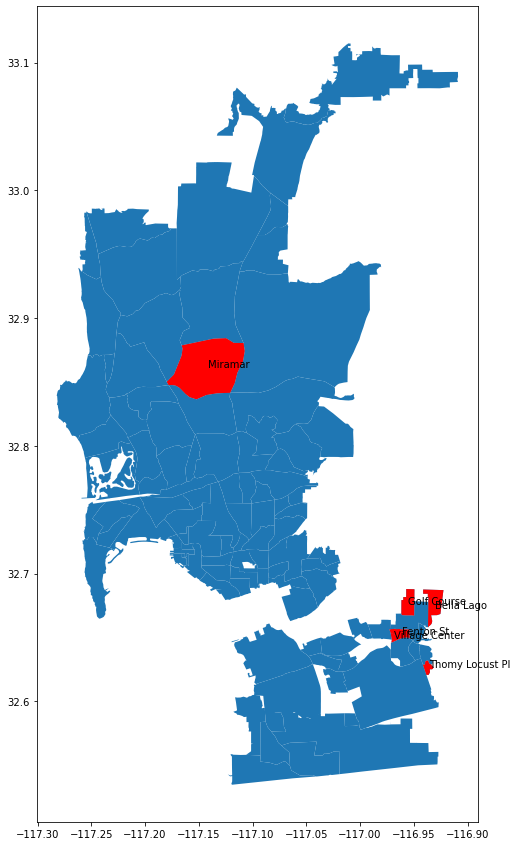

In [18]:
#where are these neighbourhood without listings
#plot all neighbourhood
f, ax = plt.subplots(1, figsize=(15,15))
gdf.plot(ax=ax)
#plot neighbourhood without lilstings
nolist.plot(ax=ax, color='red')
#add names
for x,y,label in zip(nolist.lat, nolist.long, nolist.index):
    plt.text(x,y,label)
plt.show()

Miramar is 

### Amenities

In [19]:
#remembering from data wrangling notebook, convert amenities from string to list
amenities = []
for i in listings.amenities.index:
    amenities.insert(i, ast.literal_eval(listings.amenities[i]))
listings.amenities = amenities

In [20]:
#create a list of all amenities options - to use as column name for amenities dummies data
amen_cols=[]
for elem in amenities:
    amen_cols.extend(elem)
amen_cols = list(set(amen_cols))
amen_cols

['2 burner portable stove top induction stove',
 'Samsung - brand new! refrigerator',
 'Dedicated workspace: table, office chair, and desk',
 'Humetrix conditioner',
 '55" HDTV with Netflix, Amazon Prime Video, Chromecast',
 'Barbecue utensils',
 'Espresso machine',
 'Clothing storage: walk-in closet and closet',
 'ivory body soap',
 'Shower gel',
 '55" HDTV with Roku',
 'Samsung refrigerator',
 'Record player',
 'sonos  Bluetooth sound system',
 'GE stove',
 'Keurig coffee machine',
 'Wifi – 240 Mbps',
 'TV with premium cable',
 'DVD player',
 'Shiseido conditioner',
 'PAYA shampoo',
 'Kitchen',
 'Aveeno shampoo',
 'Wet bar',
 'Frigidare  refrigerator',
 'Wifi – 60 Mbps',
 '75" HDTV with standard cable',
 'Neutrogena conditioner',
 '36" HDTV with Netflix, Amazon Prime Video, Roku',
 'Trader Joe\'s "Tea Tree Tingle" shampoo',
 'Wifi – 47 Mbps',
 'Nespresso machine',
 '55" HDTV with Netflix, Amazon Prime Video, HBO Max, Chromecast',
 '43" HDTV with Netflix',
 'Permit parking',
 '40" HDT